In [1]:
# Near-zero-intelligence secondary market maker
# RAI Project
# BlockScience
# November 18 2020

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# INTERNAL HANDLER: ERSATZ DATA
# ----------
debt_market_df = pd.read_csv('data/debt_market_df.csv', index_col='date', parse_dates=True)
market_price = pd.DataFrame(debt_market_df['p']).to_numpy().flatten()
features = ['beta', 'Q', 'v_1', 'v_2 + v_3', 
                    'D_1', 'u_1', 'u_2', 'u_3', 'u_2 + u_3', 
                    'D_2', 'w_1', 'w_2', 'w_3', 'w_2 + w_3',
                    'D']
independent_vars = debt_market_df[features].to_numpy()
# ----------

# initialize price, price history
p = 1
price_history = []

# initialize order book
order_book = np.array([0, 0])

# demand side (bids to purchase, e.g. following drop in ETH reducing collateral value)
bidvars = ['u_2']

# supply side (asks to sell, e.g. following increase in ETH increasing collateral value)
askvars = ['u_1']

bidindex = [features.index(i) for i in bidvars]
askindex = [features.index(i) for i in askvars]

# for testing: set up external or internal handler for CDP activity from APT bridge
external_handler = False

# Market making: here, while loop will purposely crash after len(market_price)
t=0
while(True): # could also set up event listener (more efficient)

    if external_handler: # production handler receiving data from bridge
        # EXTERNAL HANDLER: Receive CDP activity from APT bridge 
        # FROM: "APT_Bridge._send_feature_to_market(feature_0)"
        # feature_0 = _receive_feature_from_APT()
        # FROM: "APT_Bridge._send_expected_price_to_market(constant)"
        # expected_price = _receive_price_from_APT()
        print('external_handler')
    else: # for testing etc.
        # INTERNAL HANDLER: ERSATZ
        feature_0 = np.reshape(independent_vars[0], (-1,15)).copy()
        expected_price = market_price[t]
    
    # Create order book from demand and supply
    order_book = order_book + np.array([np.sum(feature_0[:,bidindex][0]), 
                            np.sum(feature_0[:,askindex][0])]
                          )
    
    # Zero-intelligence market-clearing price: cf. e.g. Gode & Sunder (JPE v 101 n 1, 1993)
    clearing_price = np.random.uniform(
                            min(p, expected_price), 
                            max(p, expected_price)
    )
    
    #Update order book after orders fulfilled
    book_end = order_book[0] - order_book[1]
    
    if book_end < 0: # excess supply
        order_book = np.array([0, book_end])
    else: # excess demand
        order_book = np.array([book_end, 0])
    
    if external_handler: # production handler sending data to bridge
        # EXTERNAL HANDLER: send market price to APT bridge
        # TO: "APT Bridge._receive_price_from_market()"
        # _send_price_to_APT(clearing_price)
        print('external_handler')
    else:
        # INTERNAL HANDLER: TESTING
        price_history.append(clearing_price)
    
    p = clearing_price
    t += 1
    

IndexError: index 652 is out of bounds for axis 0 with size 652

array([[1.        , 0.89730266],
       [0.89730266, 1.        ]])

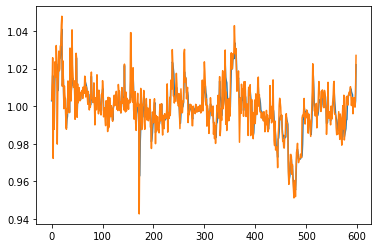

In [2]:
plt.plot(price_history[1:600])
plt.plot(market_price[1:600])
np.corrcoef(price_history, market_price)